In [1]:
import pandas as pd
import numpy as np
import os
import rpy2.robjects as rob

use_imputation = 1 # currently only 1

eval_phenotype = 0
# 0: PET av45
# 1: CSF abeta
# 2: CSF tau
# 3: CSF ptau
        

In [2]:
# A TAB separated clmuped variant list. p<5e-5 variants, obtained from GWAS of iPSC samples.
Base_clump = pd.read_csv("iPSCsamples/clumped_variant_list.clumped_tab",sep="\t")

# Imputed genotype of iPSC samples
Base_VCFfile = open("iPSCsamples/imputed_genotypes.vcf", mode="r")

# A file where the results will be written.
Base_select_file = open("iPSCsamples/clumped_variant_genotypes.txt", mode="w")
    

In [3]:
# Extract genotypes of selected variants from iPSC samples VCF and write extracted genotypes to a new file.

## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,29):
    line = Base_VCFfile.readline()
    cnt = cnt+1
    
line = Base_VCFfile.readline()
GWAS_SNP_np = Base_clump["SNP"].values
while line:
    feature = line.split(sep="\t")
    if feature[2] in GWAS_SNP_np:
        if len(np.where(GWAS_SNP_np==feature[2])) == 1:
            Base_select_file.write(line)
        else:
            for ind in range(0,len(np.where(GWAS_SNP_np==feature[2]))):
                if int(feature[0]) == int(GWAS_SNPlist[GWAS_SNP_np==feature[2]][0][ind]):
                                          Base_select_file.write(line)

    cnt = cnt+1
    line = Base_VCFfile.readline()
    if cnt%100000 == 0:
        print("finished: line "+str(cnt))

Base_select_file.close()    
Base_VCFfile.close()

finished: line 100000
finished: line 200000
finished: line 300000
finished: line 400000
finished: line 500000
finished: line 600000
finished: line 700000
finished: line 800000
finished: line 900000
finished: line 1000000
finished: line 1100000
finished: line 1200000
finished: line 1300000
finished: line 1400000
finished: line 1500000
finished: line 1600000
finished: line 1700000
finished: line 1800000
finished: line 1900000
finished: line 2000000
finished: line 2100000
finished: line 2200000
finished: line 2300000
finished: line 2400000
finished: line 2500000
finished: line 2600000
finished: line 2700000
finished: line 2800000
finished: line 2900000
finished: line 3000000
finished: line 3100000
finished: line 3200000
finished: line 3300000
finished: line 3400000
finished: line 3500000
finished: line 3600000
finished: line 3700000
finished: line 3800000
finished: line 3900000
finished: line 4000000
finished: line 4100000
finished: line 4200000
finished: line 4300000
finished: line 44000

In [4]:
# Extract genotypes of selected variants from ADNI sample VCF and write extracted genotypes to a new file.

# imputed ADNI VCF file. 
Target_VCFfile = open("ADNI/WGS_Omni25_imputed_genotypes.vcf", mode="r")
# A file where the results will be written.
Target_select_file = open("ADNI/WGS_Omni25_clumped_variant_genotypes.txt", mode="w") 
    

## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,29):
    line = Target_VCFfile.readline()
    cnt = cnt+1
    
line = Target_VCFfile.readline()

while line:
    feature = line.split(sep="\t")
    if feature[2] in GWAS_SNP_np:
        if len(np.where(GWAS_SNP_np==feature[2])) == 1:
            Target_select_file.write(line)
        else:
            for ind in range(0,len(np.where(GWAS_SNP_np==feature[2]))):
                if int(feature[0]) == int(GWAS_SNPlist[GWAS_SNP_np==feature[2]][0][ind]):
                                          Target_select_file.write(line)
    cnt = cnt+1
    line = Target_VCFfile.readline()
    if cnt%100000 == 0:
        print("finished: line "+str(cnt))

Target_select_file.close()    
Target_VCFfile.close()

finished: line 100000
finished: line 200000
finished: line 300000
finished: line 400000
finished: line 500000
finished: line 600000
finished: line 700000
finished: line 800000
finished: line 900000
finished: line 1000000
finished: line 1100000
finished: line 1200000
finished: line 1300000
finished: line 1400000
finished: line 1500000
finished: line 1600000
finished: line 1700000
finished: line 1800000
finished: line 1900000
finished: line 2000000
finished: line 2100000
finished: line 2200000
finished: line 2300000
finished: line 2400000
finished: line 2500000
finished: line 2600000
finished: line 2700000
finished: line 2800000
finished: line 2900000
finished: line 3000000
finished: line 3100000
finished: line 3200000
finished: line 3300000
finished: line 3400000
finished: line 3500000
finished: line 3600000
finished: line 3700000
finished: line 3800000
finished: line 3900000
finished: line 4000000
finished: line 4100000
finished: line 4200000
finished: line 4300000
finished: line 44000

In [5]:
# Re-load data wrote in files at above cells.
Base_selectedSNPlist = pd.read_csv("iPSCsamples/clumped_variant_genotypes.txt",sep="\t",header=None)
Target_selectedSNPlist = pd.read_csv("ADNI/WGS_Omni25_clumped_variant_genotypes.txt",sep="\t",header=None)

base_selected_var = Base_selectedSNPlist[2].tolist()
target_selected_var = Target_selectedSNPlist[2].tolist()

In [7]:
# loading genotypes to numpy array.
import subprocess

def genotype_format2num(geno_with_pipe_column):
    if use_imputation == 1:
        geno_with_pipe = geno_with_pipe_column.split("/")
        if geno_with_pipe[0].isdecimal() and geno_with_pipe[1].isdecimal():
            geno_num = int(geno_with_pipe[0]) + int(geno_with_pipe[1])
        else:
            geno_num = np.nan
    return geno_num
    
# load iPSC sample gentypes to numpy array
base_geno_df = Base_selectedSNPlist.loc[:,9:110].applymap(genotype_format2num) # 102 samples in iPSC data
base_geno_np = base_geno_df.values.transpose()

# load ADNI sample gentypes to numpy array
target_geno_df = Target_selectedSNPlist.loc[:,9:723].applymap(genotype_format2num) # 715 samples in ADNI data
if use_imputation == 1:
    Target_VCFfile = open("ADNI/WGS_Omni25_imputed_genotypes.vcf", mode="r")
    
## skip contig lines of the VCF file.
cnt = 0
for ind in range(0,28):
    line = Target_VCFfile.readline()
    cnt = cnt+1
            
line = Target_VCFfile.readline()
feature = line.split(sep="\t")
target_VCFsample_list = feature[9:724]
target_VCFsample_list[714] = target_VCFsample_list[714].split(sep="\n")[0]
Target_VCFfile.close()
if eval_phenotype==0:
    target_pheno = pd.read_csv("pheno_merge_ADNI_PET.txt",sep="\t")
else:
    target_pheno = pd.read_csv("pheno_merge_ADNI_CSF.txt",sep="\t")
target_phenosample_list = []
cnt=0
for index, row in target_pheno.iterrows():
    target_phenosample_list.append(str(int(row["FID"]))+"_"+str(int(row["IID"])).zfill(4))
    cnt=cnt+1


target_df_keep = []
cnt=0
for samp in target_VCFsample_list:
    if samp in target_phenosample_list:
        target_df_keep.append(cnt)
    cnt = cnt+1

target_geno_df = target_geno_df.filter(target_geno_df.columns[target_df_keep], axis=1)
target_geno_np = target_geno_df.values.transpose()


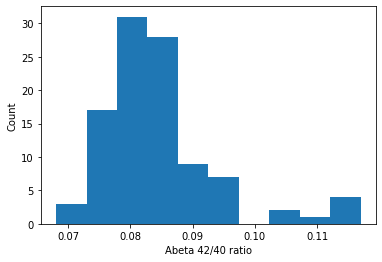

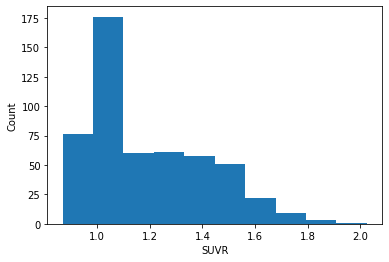

In [8]:
# loading information of covariates to numpy arrays.

import matplotlib.pyplot as plt
base_pheno = pd.read_csv("iPSCsamples/phenotype_abetaratio.txt",sep="\t")
abetaratio_np = base_pheno["abeta_ratio"].values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(abetaratio_np)
ax.set_xlabel("Abeta 42/40 ratio")
ax.set_ylabel("Count")
#plt.savefig("base_distribution")

base_cov = pd.read_csv("iPSCsamples/cov_agesexAPOE.txt",sep="\t")
base_cov_np = base_cov.loc[:,"AGE":"APOEe4"].values

target_df_keep = []
cnt=0
for samp in target_phenosample_list:
    if samp in target_VCFsample_list:
        target_df_keep.append(cnt)
    cnt = cnt+1
if eval_phenotype==0:
    target_pheno = pd.read_csv("pheno_merge_ADNI_PET.txt",sep="\t")
else:
    target_pheno = pd.read_csv("pheno_merge_ADNI_CSF.txt",sep="\t")
target_pheno = target_pheno.loc[target_df_keep,:]

if eval_phenotype==0:
    target_pheno_np = target_pheno["AV45_bl"].values
elif eval_phenotype==1:
    target_pheno_np = target_pheno["ABETA_bl"].values
elif eval_phenotype==2:
    target_pheno_np = target_pheno["TAU_bl"].values/target_pheno["ABETA_bl"].values
elif eval_phenotype==3: 
    target_pheno_np = target_pheno["PTAU_bl"].values/target_pheno["ABETA_bl"].values

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(target_pheno_np)
ax.set_xlabel("SUVR")
ax.set_ylabel("Count")
#plt.savefig("target_distribution")

if eval_phenotype==0:
    target_cov = pd.read_csv("cov_merge_ADNI_PET.txt",sep="\t")
else:
    target_cov = pd.read_csv("cov_merge_ADNI_CSF.txt",sep="\t")
target_cov = target_cov.loc[target_df_keep,:]
target_cov_np = target_cov.loc[:,"AGE":"APOE4"].values


In [9]:
# compensate missing genotype data with mean value

if np.isnan(base_geno_np).any():
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0, copy=True)
    base_geno_np = imp.fit_transform(base_geno_np)  

base_genocov_np = np.concatenate([base_geno_np,base_cov_np],axis=1)

if np.isnan(target_geno_np).any():
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0, copy=True)
    target_geno_np = imp.fit_transform(target_geno_np)

target_genocov_np = np.concatenate([target_geno_np,target_cov_np],axis=1)

In [10]:
## fulfill missing genotypes in target data with mean of base's

base_sampdim = base_geno_np.shape[0]
base_vardim = base_geno_np.shape[1]
target_sampdim = target_geno_np.shape[0]
target_vardim = target_geno_np.shape[1]
target_geno_basecoord = np.zeros([target_sampdim,base_vardim])
targetvar_isinbase = np.zeros([base_vardim,1])
base_cnt=0
target_cnt=0
for var in base_selected_var:
    if var in target_selected_var:
        targetvar_isinbase[base_cnt] = 1
        target_geno_basecoord[:,base_cnt] = target_geno_np[:,target_cnt]
        target_cnt = target_cnt+1
    else:
        targetvar_isinbase[base_cnt] = 0
        target_geno_basecoord[:,base_cnt] = np.squeeze(np.mean(base_geno_np,axis=0)[base_cnt]*np.ones([target_sampdim,1]))
        
    base_cnt=base_cnt+1

target_genocov_basecoord = np.concatenate([target_geno_basecoord,target_cov_np],axis=1)
(target_genocov_basecoord.shape)
targetvar_isinbase = np.squeeze(targetvar_isinbase)

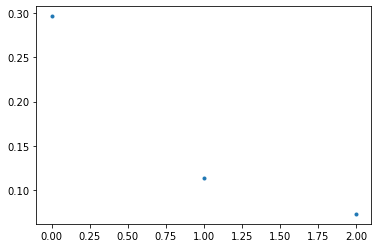

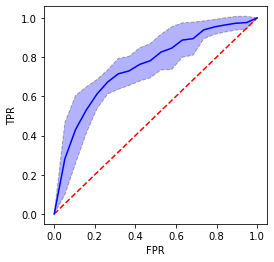

Genotype+Covariance predictor results
----------------------------------------------------------
AUC:  0.7531680857433233 ± 0.04518278339404101
[0.73735119 0.65029762 0.77265745 0.75297619 0.76236882 0.73409091
 0.79235382 0.83650794 0.73692308 0.75615385]
----------------------------------------------------------
Accuracy:  0.6906862745098039 ± 0.06254519555963935
[0.71153846 0.57692308 0.71153846 0.67307692 0.59615385 0.69230769
 0.78846154 0.74509804 0.66666667 0.74509804]
----------------------------------------------------------
f1 score:   0.6859079117700451 ± 0.052692670363462736
[0.70588235 0.59259259 0.66666667 0.65306122 0.6440678  0.68
 0.78431373 0.71111111 0.66666667 0.75471698]
----------------------------------------------------------




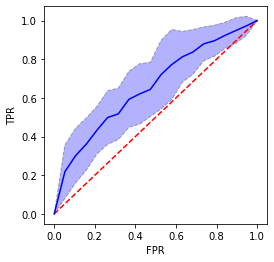

Covariance predictor results
----------------------------------------------------------
AUC:  0.6581994022183424 ± 0.10030209603532153
[0.546875   0.54613095 0.47849462 0.66741071 0.77361319 0.65075758
 0.80134933 0.71428571 0.66615385 0.73692308]
----------------------------------------------------------
Accuracy:  0.5940422322775264 ± 0.08056300274946558
[0.51923077 0.5        0.46153846 0.59615385 0.69230769 0.55769231
 0.71153846 0.58823529 0.66666667 0.64705882]
----------------------------------------------------------
f1 score:   0.5738621425839621 ± 0.1115338128481921
[0.48979592 0.48       0.36363636 0.58823529 0.72413793 0.5106383
 0.73684211 0.55319149 0.63829787 0.65384615]
----------------------------------------------------------


WilcoxonResult(statistic=3.0, pvalue=0.009765625)


In [13]:
#### Classification of phenotypes (# 0: PET av45, # 1: CSF abeta, # 2: CSF tau, # 3: CSF ptau)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score
from scipy import stats
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

if eval_phenotype==0:
    Abeta_posneg_np = target_pheno_np>1.11 #PET av45
elif eval_phenotype==1:
    Abeta_posneg_np = (target_pheno_np<977.0) #CSF abeta
elif eval_phenotype==2:
    Abeta_posneg_np = (target_pheno_np>0.27) #CSF TAU
elif eval_phenotype==3:
    Abeta_posneg_np = (target_pheno_np>0.025) #CSF pTAU
acc_summary = []
f1_summary = []
auc_summary = []
merge_tprs = []
merge_aucs = []
mean_merge_fpr = np.linspace(0, 1, 20)

cov_acc_summary = []
cov_f1_summary = []
cov_auc_summary = []
cov_merge_tprs = []
cov_merge_aucs = []

## PCA training
base_x = base_geno_np
n_components_pca = 3
scaler = StandardScaler()
base_x_scale = scaler.fit_transform(base_x)
pca = PCA(svd_solver='full', n_components = n_components_pca)
base_x_pca = pca.fit_transform(base_x_scale)
plt.plot(pca.explained_variance_ratio_,'.')

## For saving trained PCA projection
#filename = 'ab_baseiPSCpc.pkl'
#pickle.dump(pca, open(filename, 'wb'))

#plt.figure(figsize=(10,100))
#df_pcacomponent = pd.DataFrame(data=np.transpose(pca.components_[:,targetvar_isinbase==1]),columns=['PC1','PC2','PC3'],index=target_selected_var)
#sns.heatmap(df_pcacomponent,cbar_kws={'label': 'Weight'})
#plt.savefig("pcacomponent.png",format="png",dpi=300)

feat_importance_summary = np.zeros([10,6])

cnt = 0
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(target_geno_basecoord,Abeta_posneg_np):
    y_train, y_test = Abeta_posneg_np[train_index], Abeta_posneg_np[test_index]
    # genotype + covariate prediction model.
    x_train, x_test = target_geno_basecoord[train_index], target_geno_basecoord[test_index]
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    x_train_pca = np.concatenate([x_train_pca,target_cov_np[train_index]],axis=1)
    x_test_pca = np.concatenate([x_test_pca,target_cov_np[test_index]],axis=1)
    classi = RandomForestClassifier(n_estimators=100)
    classi.fit(x_train_pca, y_train)
    y_pred = classi.predict(x_test_pca)
    y_pred_prob = classi.predict_proba(x_test_pca)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1, drop_intermediate=False)
    merge_tprs.append(np.interp(mean_merge_fpr, fpr, tpr))
    merge_tprs[-1][0] = 0.0
    auc_summary = np.append(auc_summary,roc_auc_score(y_test, y_pred_prob))
    acc_summary = np.append(acc_summary,accuracy_score(y_test,y_pred))
    f1_summary = np.append(f1_summary,f1_score(y_test,y_pred))
    
    feat_importance_summary[cnt] = classi.feature_importances_
    
    ## For saving a trained random forest classifier.
    #filename = 'ab_classifier_'+str(cnt)+'.pkl'
    #pickle.dump(classi, open(filename, 'wb'))
    
    cnt = cnt + 1
    
    ## only covariate prediction model.
    x_train, x_test = target_cov_np[train_index], target_cov_np[test_index]
    cov_scaler = StandardScaler()
    x_train = cov_scaler.fit_transform(x_train)
    x_test = cov_scaler.transform(x_test)
    cov_classi = RandomForestClassifier(n_estimators=100)
    cov_classi.fit(x_train, y_train)
    y_pred = cov_classi.predict(x_test)
    y_pred_prob = cov_classi.predict_proba(x_test)[:,1]
      
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1, drop_intermediate=False)
    cov_merge_tprs.append(np.interp(mean_merge_fpr, fpr, tpr))
    cov_merge_tprs[-1][0] = 0.0
    cov_auc_summary = np.append(cov_auc_summary,roc_auc_score(y_test, y_pred_prob))
    cov_acc_summary = np.append(cov_acc_summary,accuracy_score(y_test,y_pred))
    cov_f1_summary = np.append(cov_f1_summary,f1_score(y_test,y_pred))  
    
#plt.figure(figsize=(9,4))
#df_featimportance = pd.DataFrame(data=np.transpose(feat_importance_summary),columns=['Set1','Set2','Set3','Set4','Set5','Set6','Set7','Set8','Set9','Set10'],index=['PC1','PC2','PC3','AGE','SEX','APOEe4'])
#sns.heatmap(df_featimportance,cbar_kws={'label': 'Importance'})
#plt.savefig("feat_imporance.png",format="png",dpi=300)

## genotype + covariate
# score for ROC
merge_tprs = np.asarray(merge_tprs)
mean_merge_tpr = np.mean(merge_tprs,axis=0)
std_merge_tpr = np.std(merge_tprs,axis=0)

fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0,1],[0,1],'r--')
ax.plot(mean_merge_fpr, mean_merge_tpr,'b-')
ax.fill_between(mean_merge_fpr,mean_merge_tpr-std_merge_tpr,mean_merge_tpr+std_merge_tpr,alpha=0.3,linewidth=1,linestyle='dashed',edgecolor='k',facecolor='b')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.savefig('ROC_results', dpi=600)
plt.show()
print("=================================")
print("Genotype+Covariance predictor results")
print("----------------------------------------------------------")
print("AUC:  "+str(np.mean(auc_summary))+u" \u00B1 "+str(np.std(auc_summary)))
print(auc_summary)
print("----------------------------------------------------------")
print("Accuracy:  "+str(np.mean(acc_summary))+u" \u00B1 "+str(np.std(acc_summary)))
print(acc_summary)
print("----------------------------------------------------------")
print("f1 score:   "+str(np.mean(f1_summary))+u" \u00B1 "+str(np.std(f1_summary)))
print(f1_summary)
print("----------------------------------------------------------")
print("\n")

## only covariate
# score for ROC
cov_merge_tprs = np.asarray(cov_merge_tprs)
cov_mean_merge_tpr = np.mean(cov_merge_tprs,axis=0)
cov_std_merge_tpr = np.std(cov_merge_tprs,axis=0)

fig = plt.figure(figsize=(4.0, 4.0))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0,1],[0,1],'r--')
ax.plot(mean_merge_fpr, cov_mean_merge_tpr,'b-')
ax.fill_between(mean_merge_fpr,cov_mean_merge_tpr-cov_std_merge_tpr,cov_mean_merge_tpr+cov_std_merge_tpr,alpha=0.3,linewidth=1,linestyle='dashed',edgecolor='k',facecolor='b')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
#plt.savefig('cov_ROC_results', dpi=600)
plt.show()
print("=================================")
print("Covariance predictor results")
print("----------------------------------------------------------")
print("AUC:  "+str(np.mean(cov_auc_summary))+u" \u00B1 "+str(np.std(cov_auc_summary)))
print(cov_auc_summary)
print("----------------------------------------------------------")
print("Accuracy:  "+str(np.mean(cov_acc_summary))+u" \u00B1 "+str(np.std(cov_acc_summary)))
print(cov_acc_summary)
print("----------------------------------------------------------")
print("f1 score:   "+str(np.mean(cov_f1_summary))+u" \u00B1 "+str(np.std(cov_f1_summary)))
print(cov_f1_summary)
print("----------------------------------------------------------")
print("\n")
print("=================================")
# Wilcoxon signed-rank test
print(stats.wilcoxon(auc_summary,cov_auc_summary))


#print(sum(Abeta_posneg_np))